In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 0.25.3
numpy version: 1.17.4
matplotlib version: 3.1.3


## base

In [4]:
drought_base = pd.read_csv('Drought_base_dis.csv',index_col=0)
drought_base.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,0.506419,0.502393,0.500013,0.505589,0.496928,0.494077,0.503538,0.506187,0.494572,0.504725,...,0.504308,0.496200,0.498682,0.500578,0.495678,0.495496,0.500018,0.506438,0.497937,0.496285
1,0.506816,0.502332,0.500231,0.505543,0.496770,0.494462,0.503357,0.506011,0.494455,0.504854,...,0.504754,0.496104,0.498756,0.500451,0.495646,0.495589,0.499707,0.506327,0.497829,0.496285
2,0.507062,0.502085,0.500418,0.505330,0.496793,0.494675,0.503207,0.505873,0.494215,0.504686,...,0.505144,0.496288,0.498754,0.500547,0.495649,0.495724,0.499482,0.506227,0.497800,0.496258
3,0.507145,0.501880,0.500475,0.505154,0.496758,0.494920,0.503069,0.505781,0.494183,0.504788,...,0.505448,0.496330,0.498684,0.500715,0.495640,0.495873,0.499182,0.506119,0.497783,0.496387
4,0.507221,0.501900,0.500456,0.505162,0.496803,0.495142,0.503129,0.505615,0.493952,0.504687,...,0.505858,0.496247,0.498894,0.500733,0.495573,0.495924,0.499125,0.505877,0.497882,0.496447


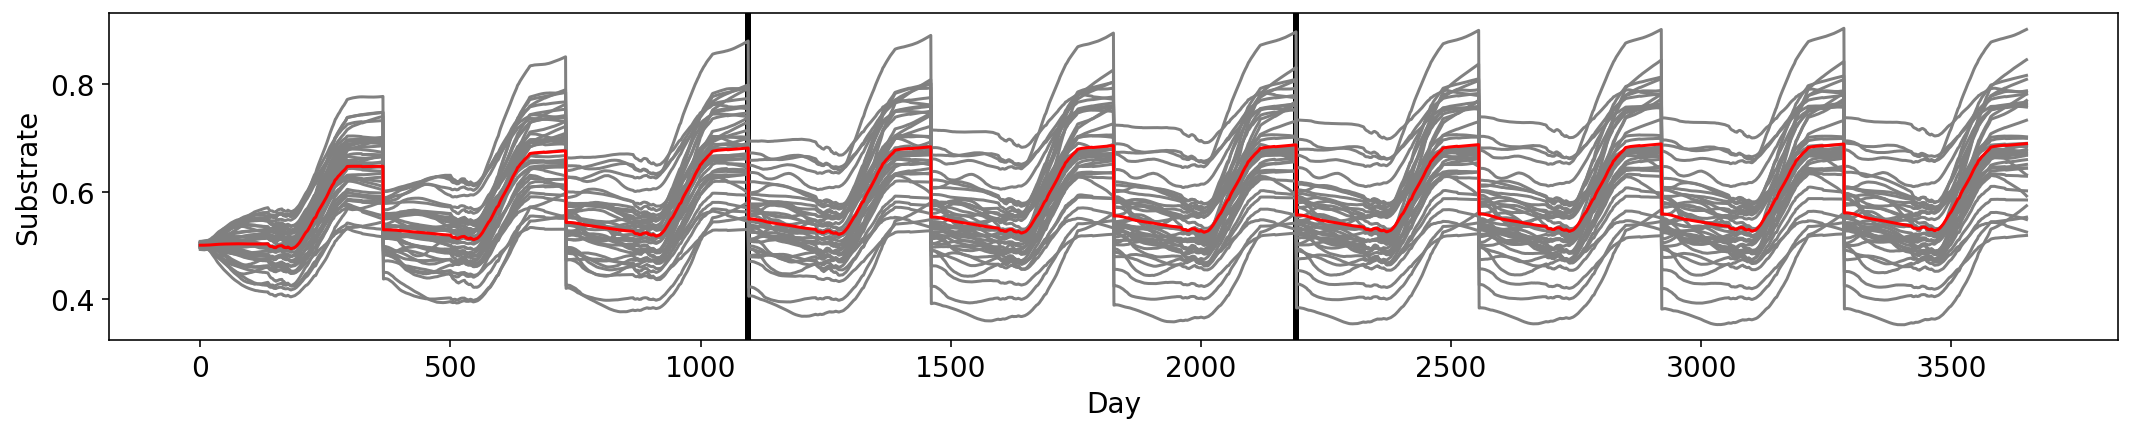

In [5]:
fig,ax = plt.subplots(1,1,figsize=(18,3))

ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)

ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(drought_base.shape[1]):
    ax.plot(drought_base.iloc[:,replicate],color='grey')
ax.plot(drought_base.mean(axis=1),color='red')

plt.show()

## basex10

In [6]:
drought_basex10 = pd.read_csv('Drought_basex10_dis.csv',index_col=0)
drought_basex10.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,0.506419,0.502393,0.500013,0.505589,0.496928,0.494077,0.503538,0.506187,0.494572,0.504725,...,0.504308,0.496200,0.498682,0.500578,0.495678,0.495496,0.500018,0.506438,0.497937,0.496285
1,0.506816,0.502332,0.500231,0.505543,0.496770,0.494462,0.503357,0.506011,0.494455,0.504854,...,0.504754,0.496104,0.498756,0.500451,0.495646,0.495589,0.499707,0.506327,0.497829,0.496285
2,0.507062,0.502085,0.500418,0.505330,0.496793,0.494675,0.503207,0.505873,0.494215,0.504686,...,0.505144,0.496288,0.498754,0.500547,0.495649,0.495724,0.499482,0.506227,0.497800,0.496258
3,0.507145,0.501880,0.500475,0.505154,0.496758,0.494920,0.503069,0.505781,0.494183,0.504788,...,0.505448,0.496330,0.498684,0.500715,0.495640,0.495873,0.499182,0.506119,0.497783,0.496387
4,0.507221,0.501900,0.500456,0.505162,0.496803,0.495142,0.503129,0.505615,0.493952,0.504687,...,0.505858,0.496247,0.498894,0.500733,0.495573,0.495924,0.499125,0.505877,0.497882,0.496447


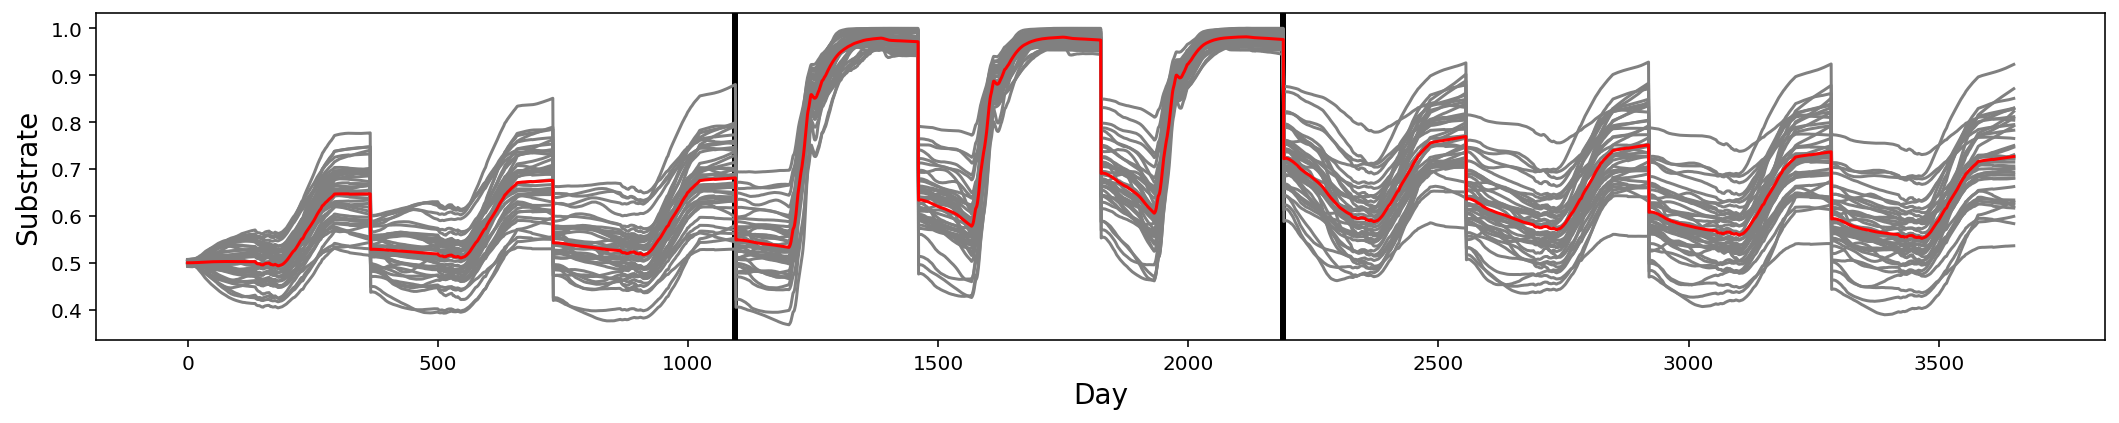

In [7]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(drought_basex10.shape[1]):
    ax.plot(drought_basex10.iloc[:,replicate],color='grey')
ax.plot(drought_basex10.mean(axis=1),color='red')

plt.show()

### Re-assembled dataset of years 3, 6, & 9

In [8]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

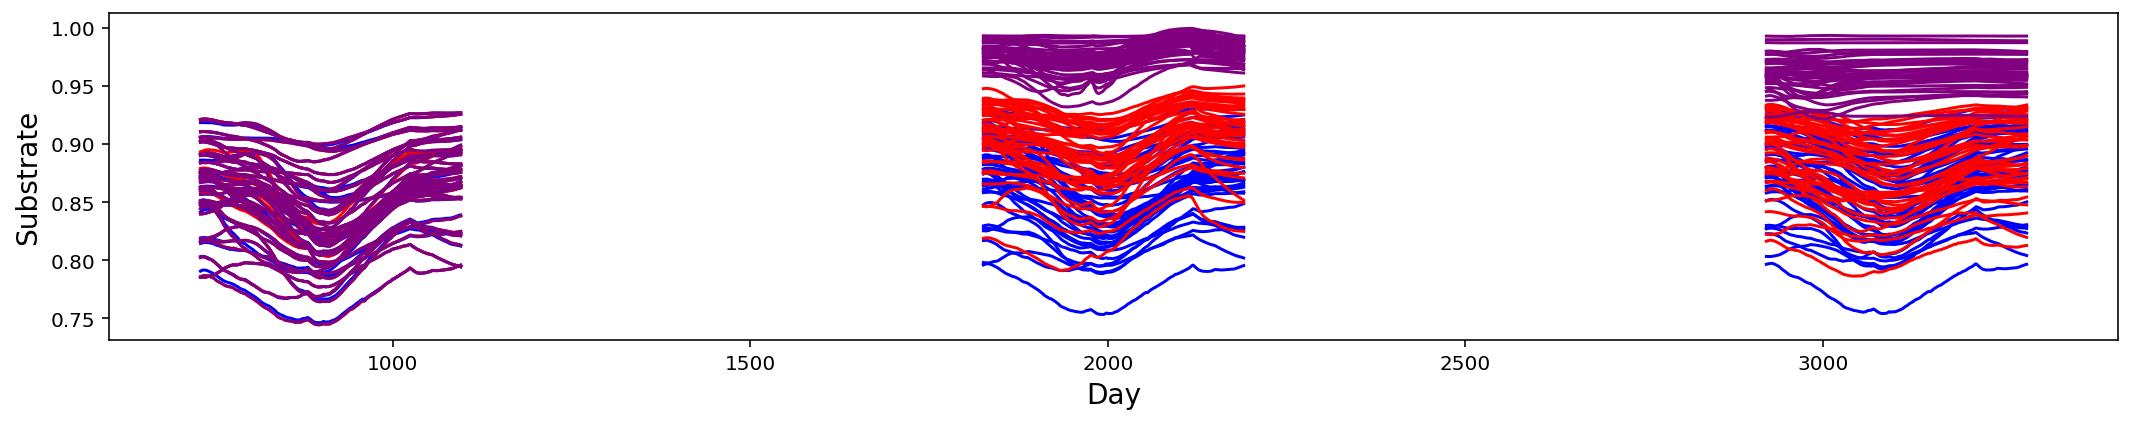

In [18]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
#ax.axvline(x=365*6, color='k',linestyle='-',lw=2)


for replicate1 in range(drought_base.shape[1]):
    ax.plot(drought_base.iloc[index_3,replicate1],color='blue')
    ax.plot(drought_base.iloc[index_6,replicate1],color='blue')
    ax.plot(drought_base.iloc[index_9,replicate1],color='blue')
    
for replicate2 in range(drought_basex2.shape[1]):
    ax.plot(drought_basex2.iloc[index_3,replicate2],color='red')
    ax.plot(drought_basex2.iloc[index_6,replicate2],color='red')
    ax.plot(drought_basex2.iloc[index_9,replicate2],color='red')
    
    
for replicate10 in range(drought_basex10.shape[1]):
    ax.plot(drought_basex10.iloc[index_3,replicate10],color='purple')
    ax.plot(drought_basex10.iloc[index_6,replicate10],color='purple')
    ax.plot(drought_basex10.iloc[index_9,replicate10],color='purple')

### visualization 2

- make the 3 years stick together

In [9]:
drought_base369    = drought_base.iloc[index_369,:].reset_index(drop=True)
#drought_basex2369  = drought_basex2.iloc[index_369,:].reset_index(drop=True)
#drought_basex4369  = drought_basex4.iloc[index_369,:].reset_index(drop=True)

drought_basex10369 = drought_basex10.iloc[index_369,:].reset_index(drop=True)

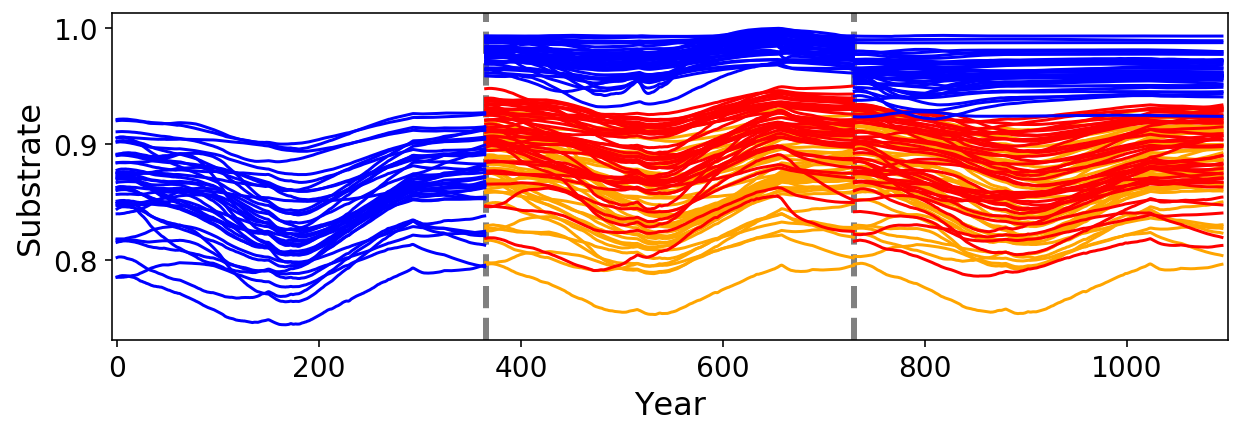

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in range(drought_base369.shape[1]):
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(drought_base369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(drought_base369.iloc[365*2:365*3,replicate],color='orange')
    
for replicate in range(drought_basex2369.shape[1]):
    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(drought_basex2369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(drought_basex2369.iloc[365*2:365*3,replicate],color='red')

for replicate in range(drought_basex10369.shape[1]):
    ax.plot(drought_basex10369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(drought_basex10369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(drought_basex10369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

## define confidence interval function

In [10]:
def confi_interval(df):
    alpha = 0.05
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

In [13]:
bound369    = confi_interval(drought_base369.iloc[:,:])

#boundx2369  = confi_interval(drought_basex2369.iloc[:,:])
#boundx4369  = confi_interval(drought_basex4369.iloc[:,:])

boundx10369 = confi_interval(drought_basex10369.iloc[:,:])

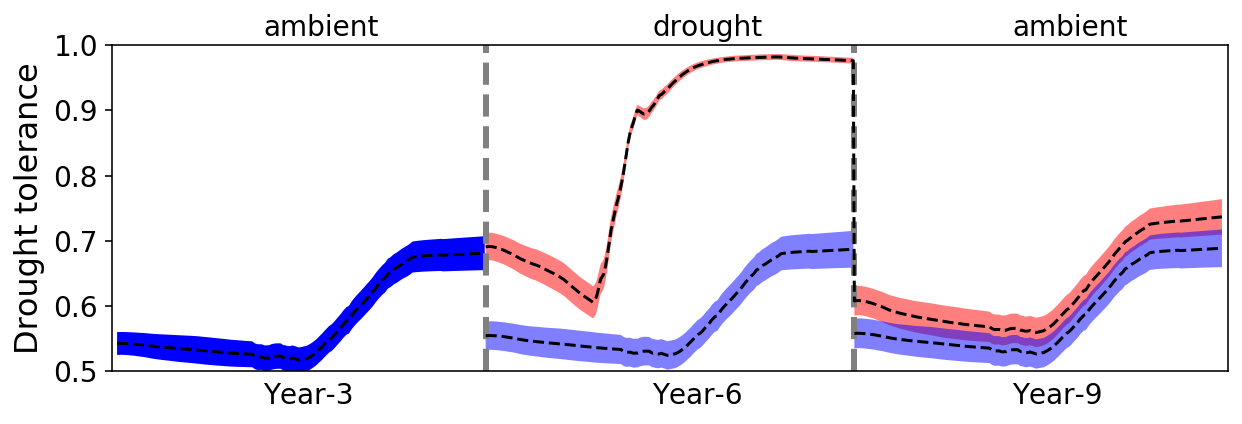

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.set_ylim(0.5,1.0)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Drought tolerance",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)

ax.plot(drought_basex10369.mean(axis=1)[365*1:365*3],color='k',linestyle='--')
ax.fill_between(x=drought_basex10369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='red',alpha=0.5)
ax.fill_between(x=drought_basex10369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='red',alpha=0.5)


ax.plot(drought_base369.mean(axis=1)[365*0:365*1],color='k',linestyle='--')
ax.fill_between(x=drought_base369.index[365*0:365*1], y1=bound369[0][365*0:365*1],y2=bound369[1][365*0:365*1],facecolor='blue', alpha=1.0) 

ax.plot(drought_base369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=drought_base369.index[365*1:365*2], y1=bound369[0][365*1:365*2],y2=bound369[1][365*1:365*2],facecolor='blue', alpha=0.5)

ax.plot(drought_base369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=drought_base369.index[365*2:365*3], y1=bound369[0][365*2:365*3],y2=bound369[1][365*2:365*3],facecolor='blue', alpha=0.5) 

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()